In [114]:
from pathlib import Path
from typing import Tuple, Optional
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
FIGSIZE = (13, 8)
DPI = 300

Create the colour scheme which is based on [nordtheme](https://www.nordtheme.com/)

In [27]:
nord = [
    "#2e3440", 
    "#3b4252", 
    "#434c5e", 
    "#4c566a", 
    "#d8dee9", 
    "#e5e9f0", 
    "#eceff4", 
    "#8fbcbb", 
    "#88c0d0", 
    "#81a1c1", 
    "#5e81ac", 
    "#bf616a", 
    "#d08770",
    "#ebcb8b",
    "#a3be8c",
    "#b48ead",
]
polar_night = nord[:4]
snow_storm = nord[4:7]
frost = nord[7:11]
aurora = nord[11:]

nord_pal = [*aurora, *frost, polar_night[-1], snow_storm[0]]
idxs = [5, 1, 3, 7, 2, 9, 0, 6, 4, 10, 8]
nord_pal = sns.color_palette([nord_pal[i] for i in idxs])
sns.set_palette(nord_pal)

In [3]:
root = Path("../")
evaluation_dir = root / "results/evaluation"

In [124]:
def draw_violin_plot(
    data: pd.DataFrame, 
    x: str, 
    y: str, 
    title: str,
    xtitle: Optional[str] = None,
    ytitle: Optional[str] = None,
    hue: Optional[str] = None, 
    ylim: Optional[Tuple[int, int]] = None
):
    fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
    sns.violinplot(x=x, y=y, hue=hue, data=data, split=True, bw=.1, cut=0, inner="quartile", scale="count")
    
    if ylim:
        ax.set_ylim(ylim)
        
    ax.set_title(title)
    
    if xtitle:
        ax.set_xlabel(xtitle)
        
    if ytitle:
        ax.set_ylabel(ytitle)
        
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color=polar_night[-1], linewidth=0.75, alpha=0.5)
    ax.grid(b=True, which='minor', color=snow_storm[0], linewidth=0.5)
        
    return fig, ax

# Read BLAST identity

In [4]:
read_identity_files = list(evaluation_dir.rglob("*.read_identity.csv"))
print(f"{len(read_identity_files)} CSV files")

16 CSV files


In [19]:
frames = []
for csvfile in read_identity_files:
    df = pd.read_csv(csvfile)
    sample, model = csvfile.name.split(".")[:2]
    df["sample"] = sample
    df["model"] = model
    frames.append(df)
data = pd.concat(frames)

Here we plot the [BLAST identity][blast] for each read. Each sample has been grouped together into one violin plot per basecalling model. To get the BLAST identity, we basecalled the reads with the respective model and mapped those basecalls to the "truth" assembly. To calculate the BLAST identity for each mapping, we take the number of matching bases divided by the length of the alignment. For more information, refer to [this][pafpy-blast] implementation.  

The Y-axis of the plot has been "zoomed in" to get a better sense of how the models compare.

[blast]: https://lh3.github.io/2018/11/25/on-the-definition-of-sequence-identity#blast-identity
[pafpy-blast]: https://pafpy.xyz/pafrecord.html#pafpy.pafrecord.PafRecord.blast_identity

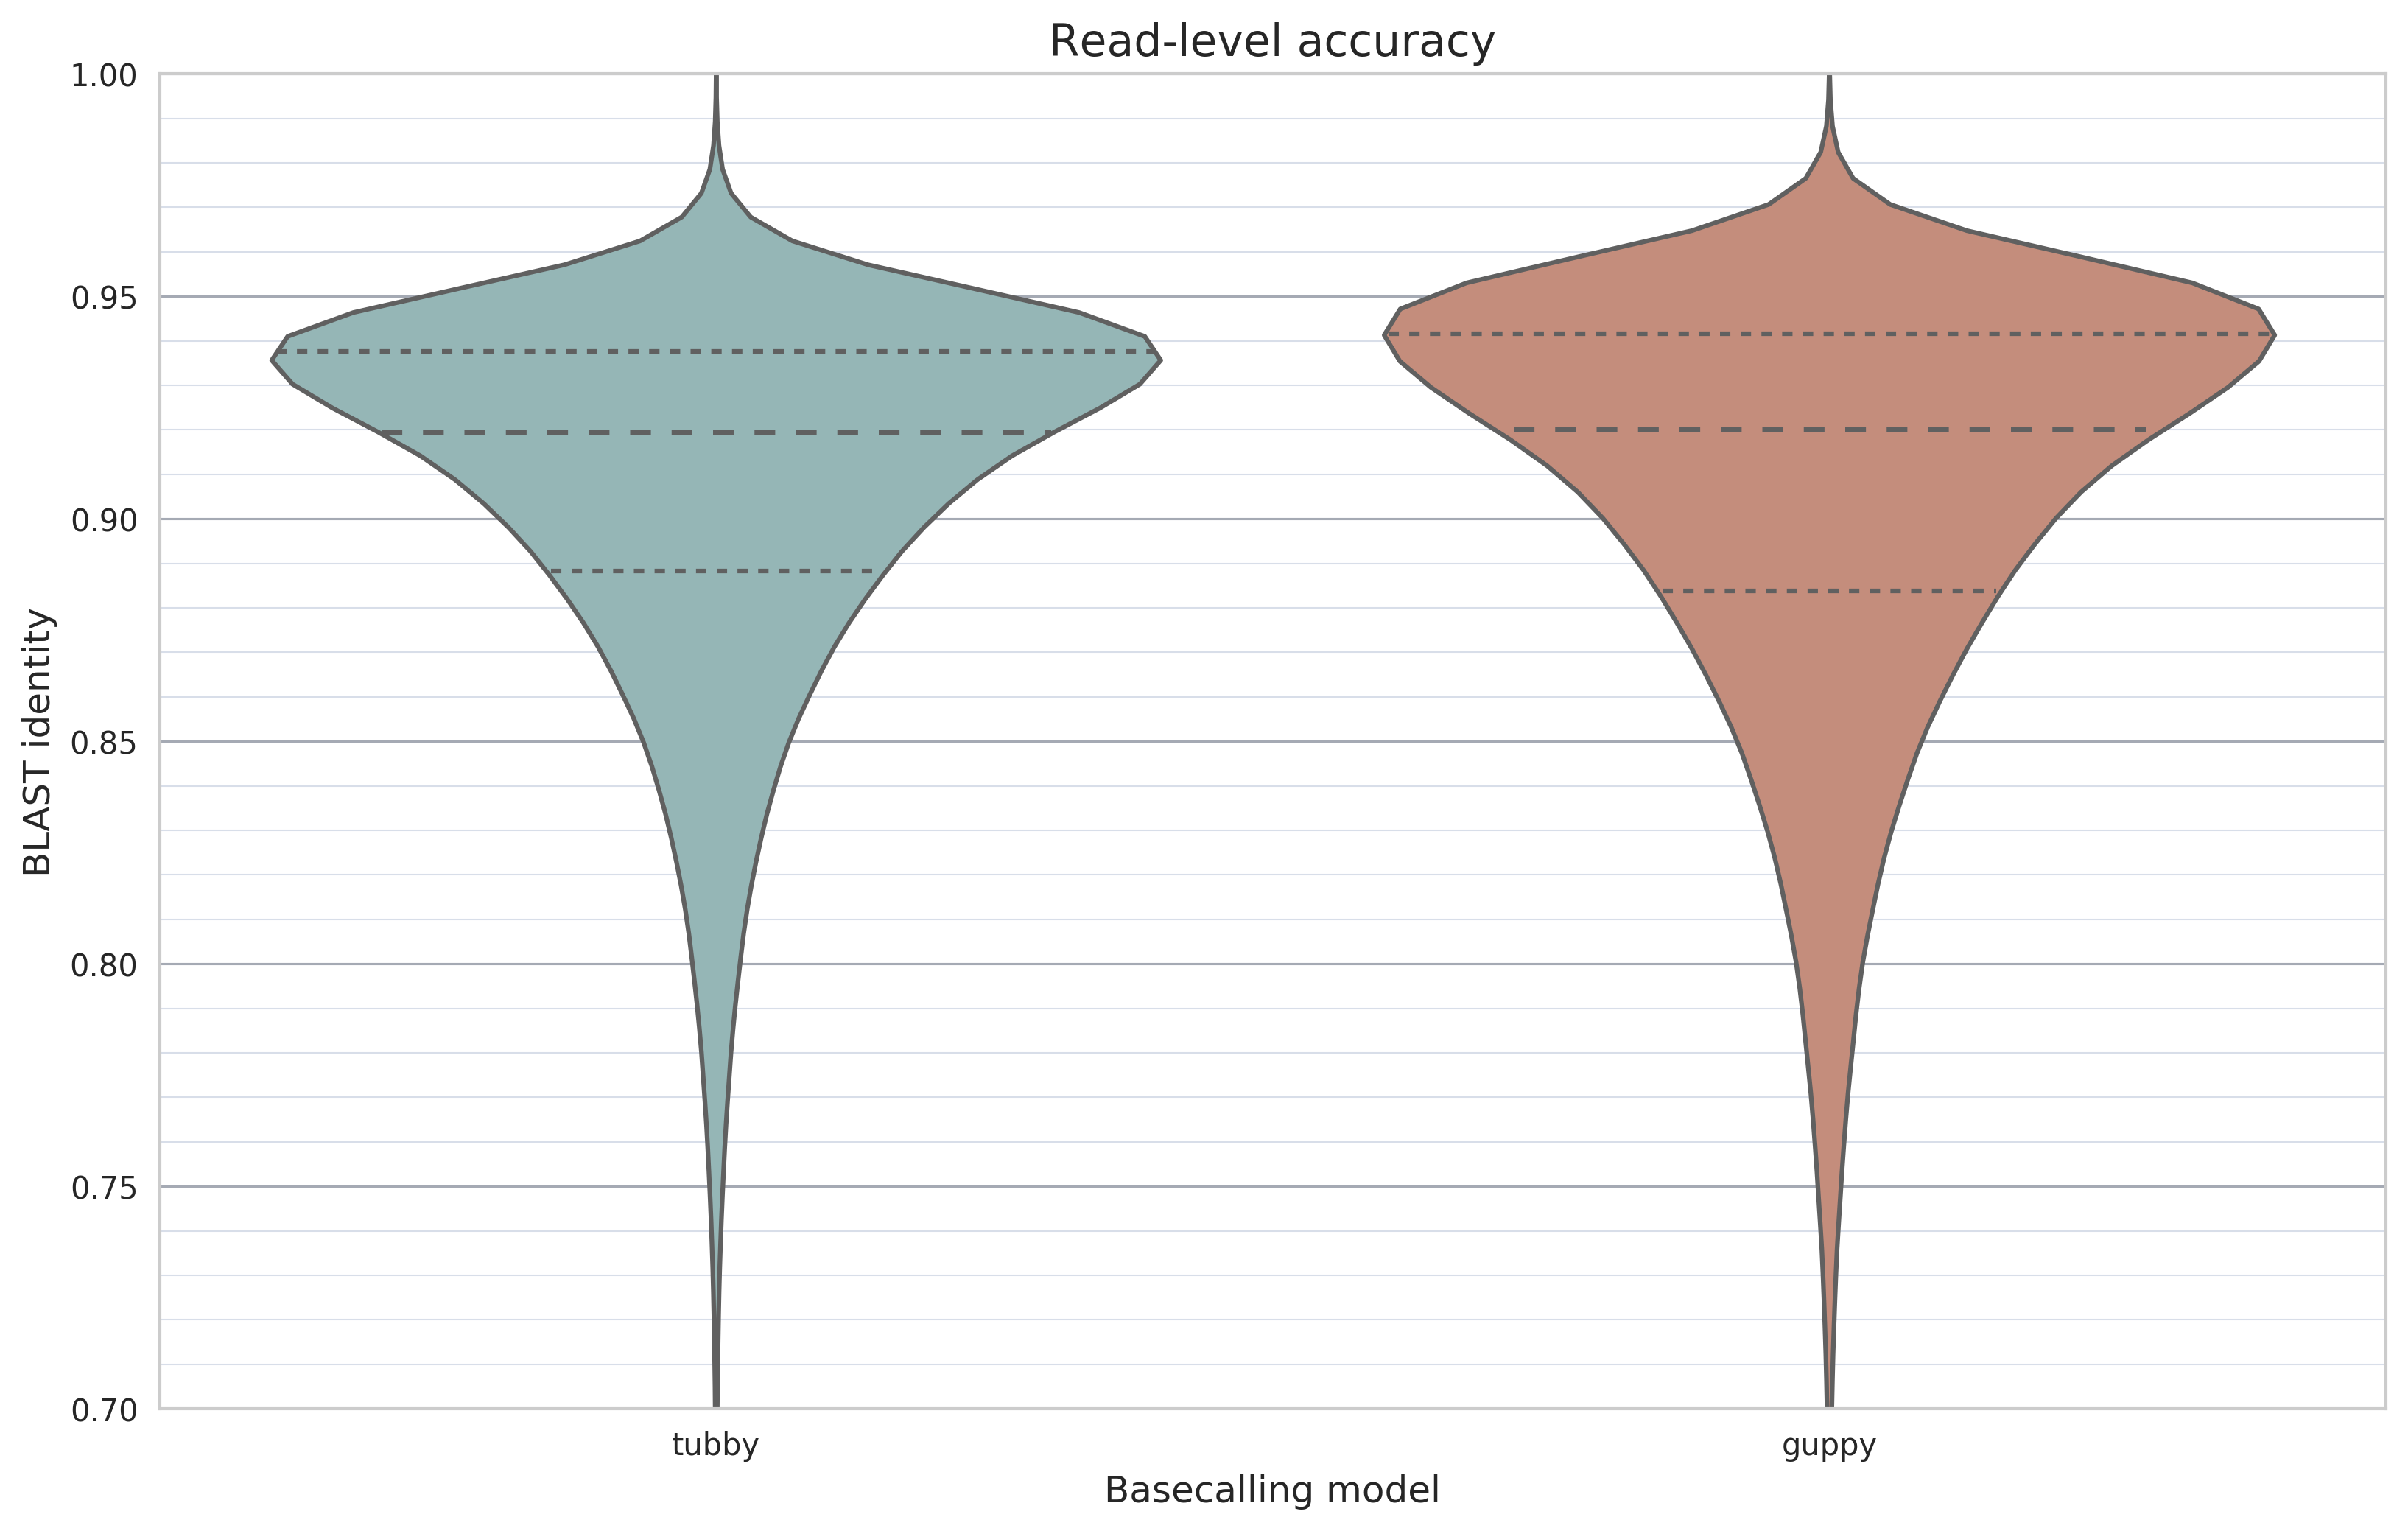

In [118]:
title = "Read-level accuracy"
xtitle = "Basecalling model"
ytitle = "BLAST identity"
ylim = (0.7, 1.0)
fig, ax = draw_violin_plot(data, x="model", y="identity", ylim=ylim, title=title, xtitle=xtitle, ytitle=ytitle)

## Summary statistics

In [115]:
data.groupby("model")["identity"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
guppy,1047256.0,0.906706,0.047993,0.418569,0.883851,0.920139,0.941590,1.0
tubby,1045512.0,0.907458,0.042717,0.468840,0.888199,0.919440,0.937628,1.0


# Relative read length

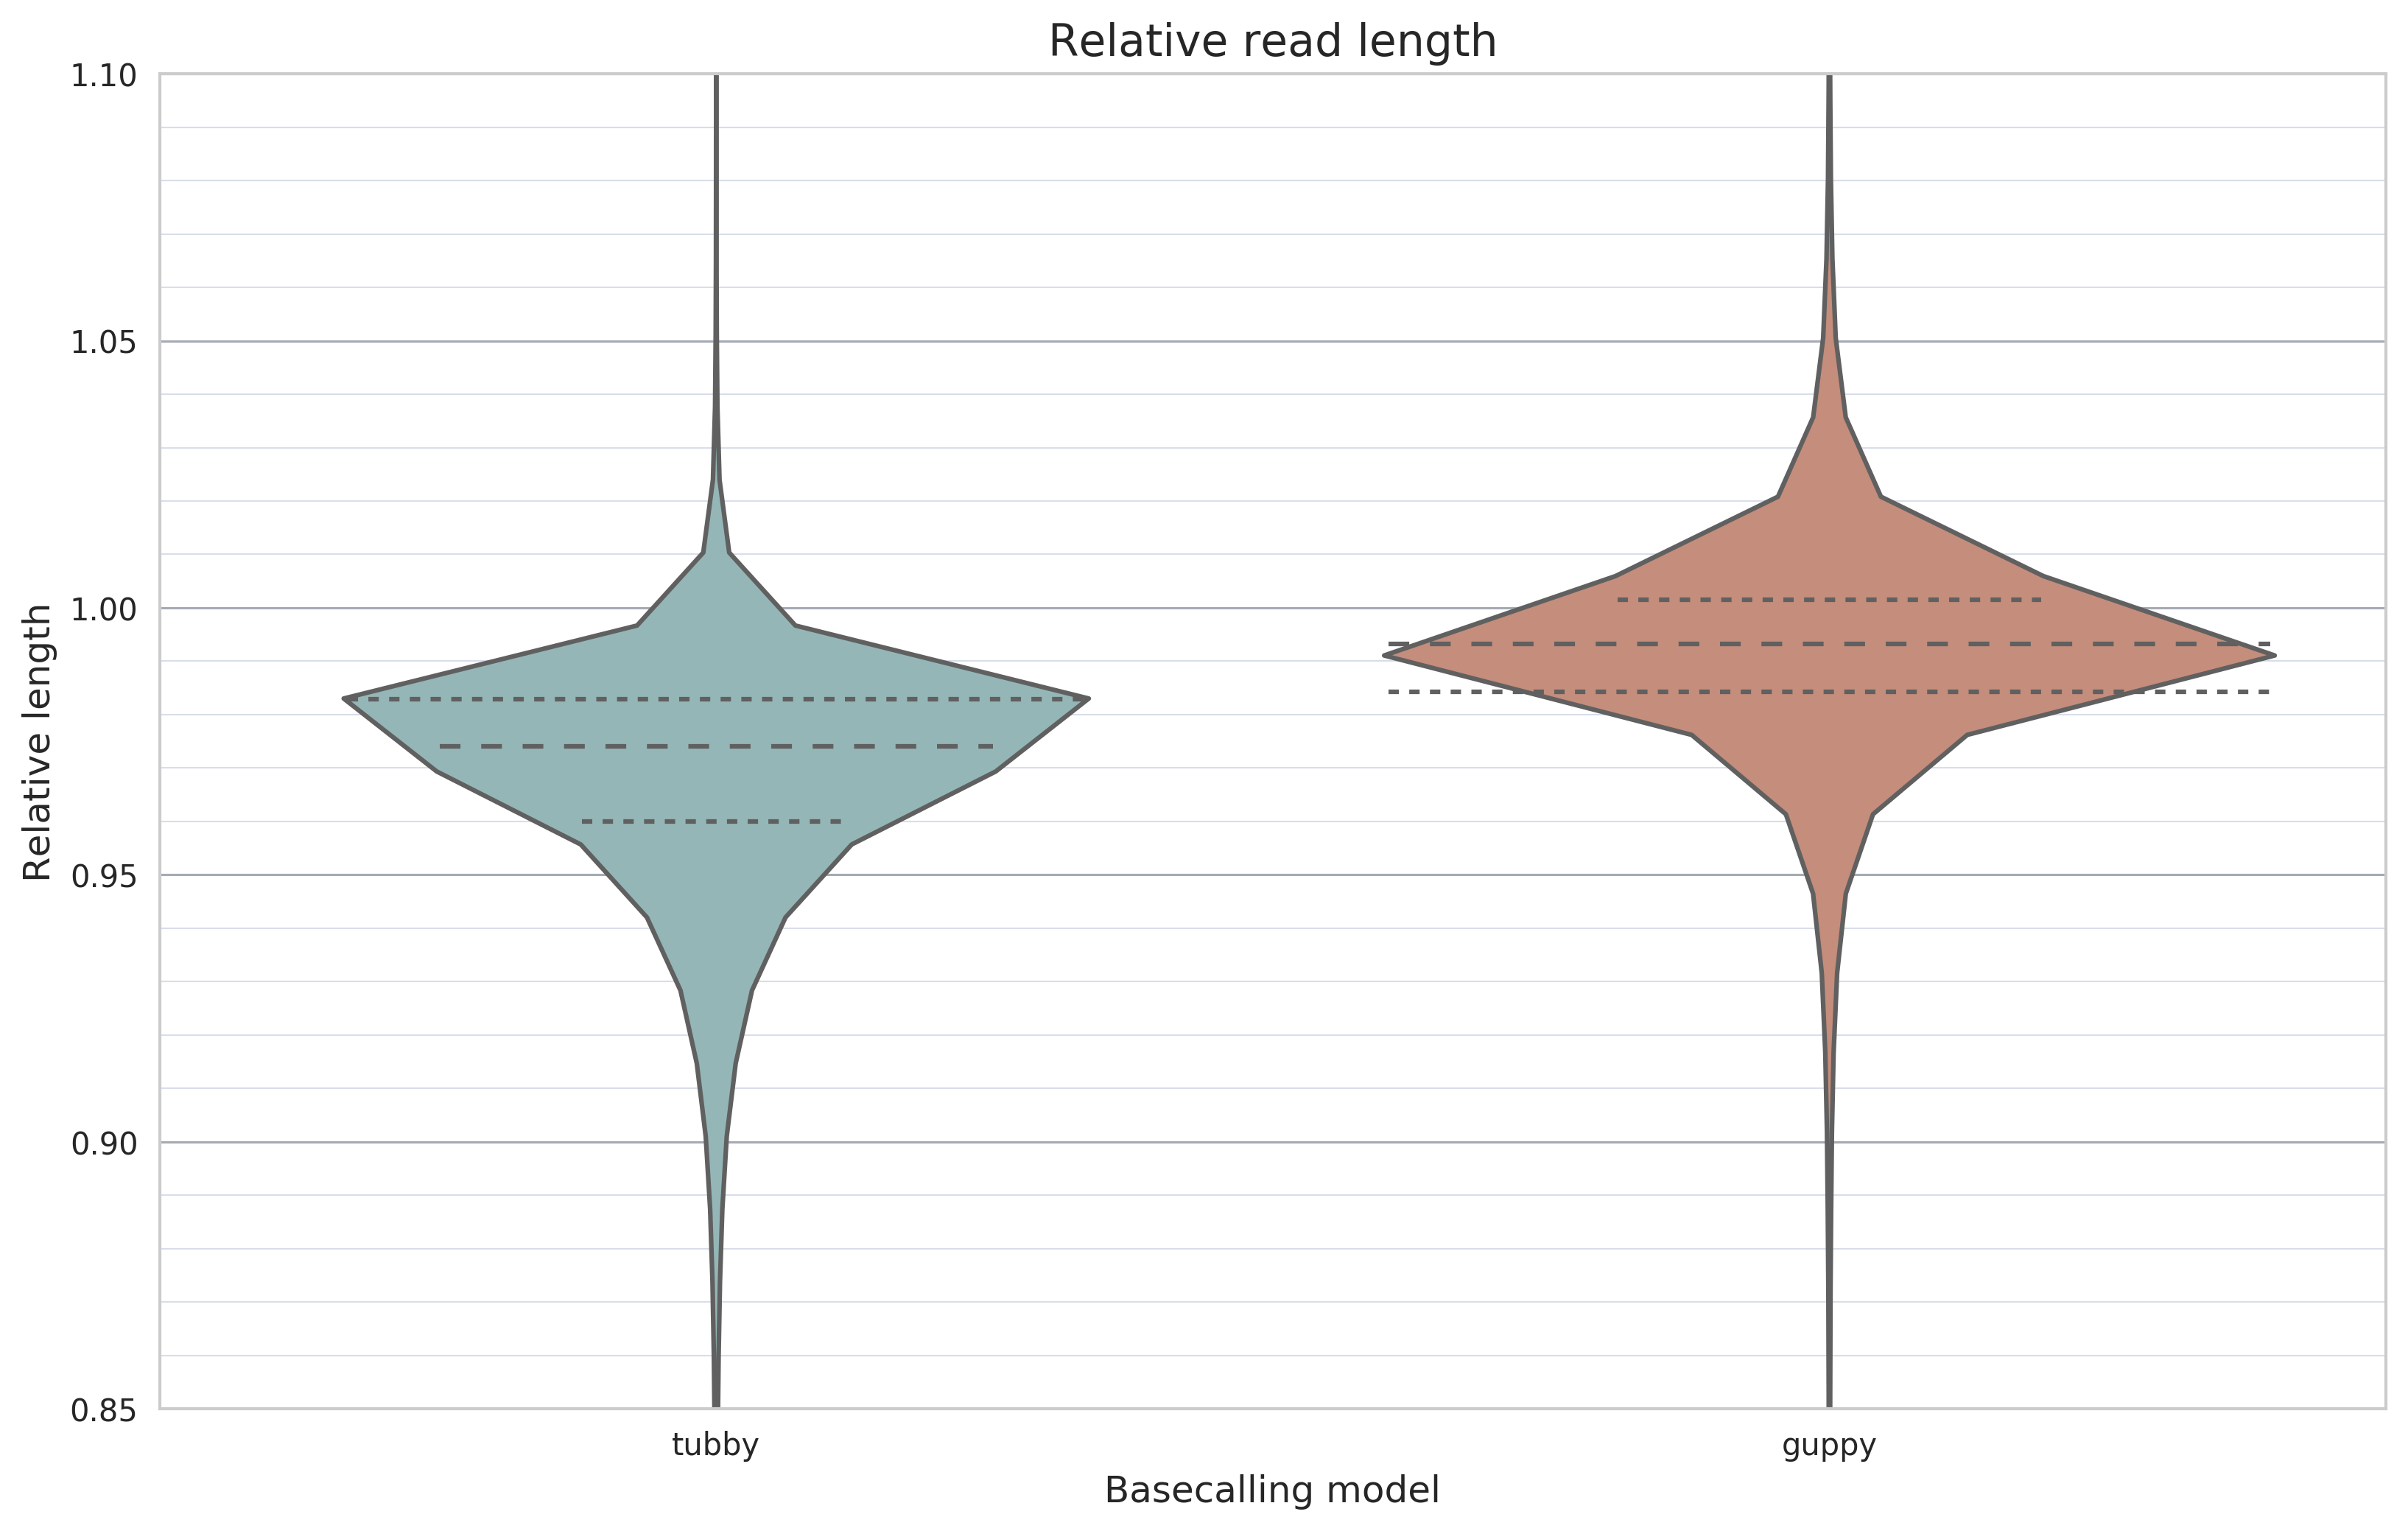

In [126]:
title = "Relative read length"
xtitle = "Basecalling model"
ytitle = "Relative length"
ylim = (0.85, 1.1)
fig, ax = draw_violin_plot(data, x="model", y="relative_len", ylim=ylim, title=title, xtitle=xtitle, ytitle=ytitle)

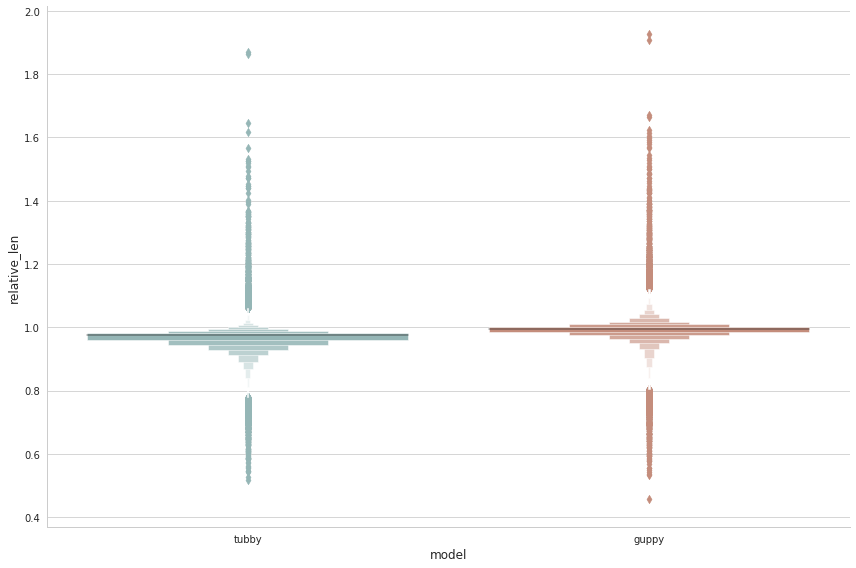

In [129]:
sns.catplot(x="model", y="relative_len", kind="boxen", data=data, height=8, aspect=1.5)